# Исследование продаж в интернет-магазине

**Входные данные:**      
В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).    
Перед нами  данные до 2016 года.   

**Цель исследования:**   
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Исследование пройдет в пять шагов:**  
  
**1 шаг.** [Открыть файл с данными и изучить общую информацию.](#one)  
     
**2 шаг.** [Предобработка данных](#two)    
    2.1 [Нижний регистр в названиях столцов](#two1)  
    2.2 [Обработка пропусков при необходимости](#two2)  
    2.3 [Типы данных в каждом столбце](#two3)   
    2.4 [Отдельный столбец с суммарными продажами во всех регионах](#two4)  
  
**3 шаг.** [Исследовательский анализ данных](#three)      
    3.1 [Анализ выпуска игр ежегодно](#three1)      
    3.2 [Продажи по платформам](#three2)       
    3.3 [Определение актуального периода для будущего анализа](#three3)        
    3.4 [Определение потенциально прибыльных платформ](#three4)        
    3.5 [График по глобальным продажам игр в разбивке по платформам](#three5)        
    3.6 [Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков](#three6)  
    3.7.[Распределение игр по жанрам](#three7)     
      
**4 шаг.** [Портрет пользователя каждого региона](#four)        
    4.1 [Самые популярные платформы (топ-5)](#four1)        
    4.2 [Самые популярные жанры (топ-5)](#four2)          
    4.3 [Влияние рейтинга ESRB на продажи в отдельном регионе](#four3)   

**5 шаг.** [Проверка гипотез](#five)        
    4.1 [Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#five1)       
    4.2 [Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#five2)          
                
**6 шаг.** [Общий вывод](#six)

# <a id="one"></a> **1 шаг.** Открыть файл с данными и изучить общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as numpy
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод шаг 1 Открыть файл с данными и изучить общую информацию**

Описание данных:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score`— оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   

В таблице 16715 строк. 

Пропуски в столбцах:     
- `Name` — название игры
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `Critic_Score`— оценка критиков
- `User_Score` — оценка пользователей
- `Rating` — рейтинг от организации ESRB 

Столбцы, которым надо заменить тип данных:    
- `Year_of_Release` — поменять из float64 в формат даты
- `User_Score` — поменять из object  в формат float64

Все столбцы нужно привести к нижнему регистру, для более комфортного чтения.

# **2 шаг.** <a id="two"></a>Предобработка данных  

## 2.1 <a id="two1"></a> Нижний регистр в названиях столцов

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.2 <a id="two2"></a> Обработка пропусков при необходимости

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- `Name` — 2 пропуска. Мы не можем сами вписать наименование. И без наименования нет возможности анализировать игру. 2 игры от 16715 игр это 0,01%. Мы  можем удалить эти 2 безымянные игры.

In [8]:
data = data.dropna(subset=['name'])
print('Количество пропущенных значений', data['name'].isna().sum())

Количество пропущенных значений 0


- `Genre`- 2 пропуска. Мы можем удалить их, не повлияв на общие данные 

In [9]:
data = data.dropna(subset=['genre'])
print('Количество пропущенных значений', data['genre'].isna().sum())

Количество пропущенных значений 0


- `Year_of_Release` — 269 пропусков. Проверим на аномальные значения.

In [10]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

 Аномальных значений в столбце 'year_of_release' нет. Мы не сможем заполнить самостоятельно пропуски. 269 значений из 16714 это 1,6%. Пока оставим пропуски.

- `Critic_Score` — 8578 пропусков.
- `User_Score` — 6708 пропусков.  
Проверим на аномальные значения.

In [11]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Аномальных значений в столбце 'critic_score' нет. Все знаения находятся в диапозоен от 0 до 100 как положено. Мы не сможем заполнить самостоятельно пропуски. 8578 значений из 16714 это 51 %. Оставляем пропуски. Причины, которые могли привести к пропускам: данная игра не оценивалась критиками из-за малой популярности или ошибки при заполнении 

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аномальных значений в столбце 'user_score' нет. Все значения находятся в диапозоне от 0 до 10, как положено. Мы не сможем заполнить самостоятельно пропуски. 9125 значений из 16714 это 54%. Оставляем пропуски. Причины, которые могли привести к пропускам: данная игра не оценивалась пользователями из-за малой популярности или ошибки при заполнении 

- `Rating` — 6766 пропусков.

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

> «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

Информация выше из википедии по ссылке https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
Мы можем сделать вывод, что формат 'K-A' это то же самое, то 'E'. Преобразуем для чистоты исследования в 'E'

In [14]:
data['rating'] = data['rating'].str.replace('K-A', 'E', regex=True)

In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Пропуски мы в данном столбце заменим на not_inf

In [16]:
data['rating'] = data['rating'].fillna('not_inf') 
print('Количество пропущенных значений', data['rating'].isna().sum())

Количество пропущенных значений 0


In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

## 2.3 <a id="two3"></a> Типы данных в каждом столбце


Столбцы, которым надо заменить тип данных:    
- `Year_of_Release` — поменять из float64 в формат даты
- `User_Score` — поменять из object  в формат float64

In [18]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [19]:
data['year_of_release']= data['year_of_release'].convert_dtypes() 

In [20]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы не можем поменять формат, так как в файле есть tbd. tbd- переводится на русский язык как подлежит утонению.В качестве пропуска можно взять numpy.nan из библиотеки numpy

In [21]:
data['user_score'] = data['user_score'].replace('tbd', numpy.nan)

In [22]:
data['user_score'] = data['user_score'].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


## 2.4 <a id="two4"></a> Отдельный столбец с суммарными продажами во всех регионах

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [25]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_inf,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_inf,31.38


**Вывод шаг 2. Предобработка данных**   
1. Заменили названия столбцов (привели к нижнему регистру)
2. Пропуски:    
- Убрали 2 строки с пропусками в столбцах name, genre
- Формат 'K-A' это то же самое, то 'E'. Преобразовали  для чистоты исследования в 'E'
- Пропуски в остальных столбцах остались так же.
3. Изменили типы данных для столбцов year_of_release, user_score
4. Посчитали суммарные продажи во всех регионах и записали их в столбец total_sales.

# **3 шаг.** <a id="three"></a> Исследовательский анализ данных 

## 3.1 <a id="three1"></a> Анализ выпуска игр ежегодно 

In [26]:
data[['year_of_release']].describe()

,year_of_release
count,16444.0
mean,2006.486256
std,5.875525
min,1980.0
25%,2003.0
50%,2007.0
75%,2010.0
max,2016.0


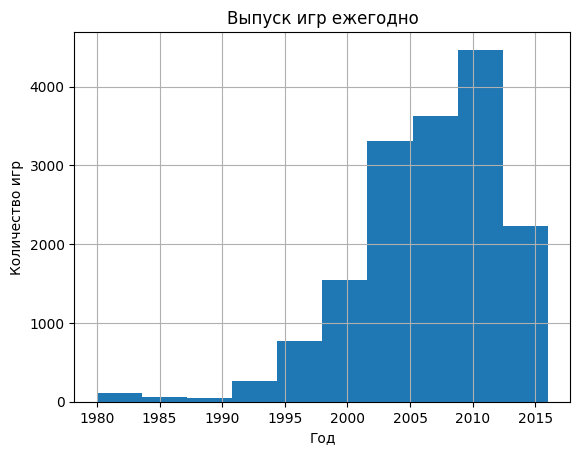

In [27]:
data['year_of_release'].hist()
plt.title('Выпуск игр ежегодно')
plt.xlabel('Год')
plt.ylabel("Количество игр")
plt.show()

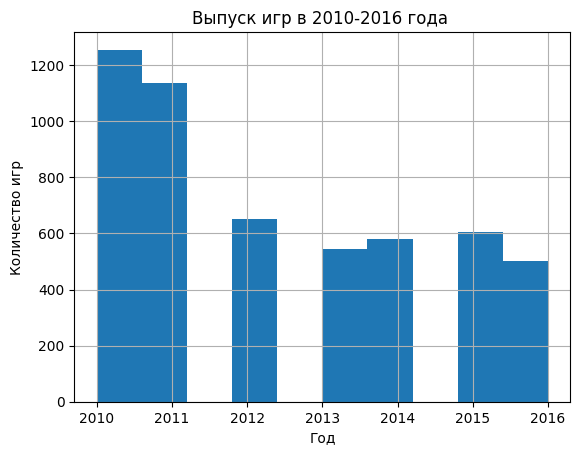

In [28]:
data['year_of_release'].hist(range=(2010,2016))
plt.title('Выпуск игр в 2010-2016 года ')
plt.xlabel('Год')
plt.ylabel("Количество игр")
plt.show()

Самый пик выпуска игр в 2005-2013 году. В 1980 видно первые выпуски игр. В 1985-1990 выпуск игр уменьшился. Но после до 2013 года был непрерывный рост. Почему после 2013 года был спад в 2 раза? Эту информацию я начала искать в интернете 
>История компьютерных игр начинается в 1940-х и 1950-х годах, когда в академической среде разрабатывались простые игры и симуляции. Компьютерные игры длительное время не были популярны, и только в 1970-х и 1980-х годах, когда появились доступные для широкой публики аркадные автоматы, игровые консоли и домашние компьютеры, компьютерные игры становятся частью поп-культуры.

>1983 год стал началом мирового кризиса рынка домашних консолей, широко известный как Кризис индустрии компьютерных игр 1983 года. Кризис продолжался до 1985 года, в результате чего многие компании были вынуждены покинуть рынок.

Источник Википедия 

>Экономический кризис 2008 года, несмотря на мировой масштаб, для игровой индустрии был событием далеко не таким разрушительным. Но вот его влияние на современные игры и индустрию мы можем ощутить и сегодня.

>Игровая индустрия уходит в штопор
Спад продаж нового поколения консолей привёл к сокращению потенциального рынка сбыта.

>В разгар кризиса корпорации решают сконцентрироваться на самых прибыльных брендах, а все остальные ресурсы перенаправить в сектор мобильных и онлайн-игр. 

>В 2012 году New-York Times писала, что игры становятся для американцев дорогим развлечением и для многих проще раз в месяц покупать подписку по цене билета в кино на одну единственную игру, чем тратить по 60 долларов хотя бы раз в месяц. А многие переходят на free-to-play проекты. Хотя их слова «розничная торговля играми за 60 долларов уже на смертном одре» явно опережали реальность.

>Тогда же начали стремительно расти мобильные игры. Поскольку в новых условиях многие были не готовы бежать за новой консолью, а вот смартфоны, которые после выхода iPhone заняли важнейшее место, пришлись очень кстати. 

>Рынок стал перестраиваться на онлайновые рельсы. Многие разработчики, которым сложно было потянуть крупный онлайн-проект, уходили в новую нишу – браузерные игры, которые со временем потихоньку перетекли в мобильные игры и так далее. Естественным желанием компаний было сокращение издержек и повышение прибыли.

Истоник https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda

Из статья понятно то после кризиса 2008 года после некторого промежутка времени стали популярные онлайн игры и мобильные игры 

## 3.2 <a id="three2"></a> Продажи по платформам  

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. 

In [29]:
top5 = (data.groupby('platform', as_index=False).agg({'total_sales' : 'sum'}) # группируем по платформам и считаем сумму продаж
                                                   .sort_values(by='total_sales', ascending=False) # сортируем по убыванию продаж
                                                   .rename({'platform' : 'Платформа'
                                                          , 'total_sales' : 'Всего продаж'}, axis=1) # переименовываем столбцы
)[:5]

top5

,Платформа,Всего продаж
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


Text(0, 0.5, 'Продажи')

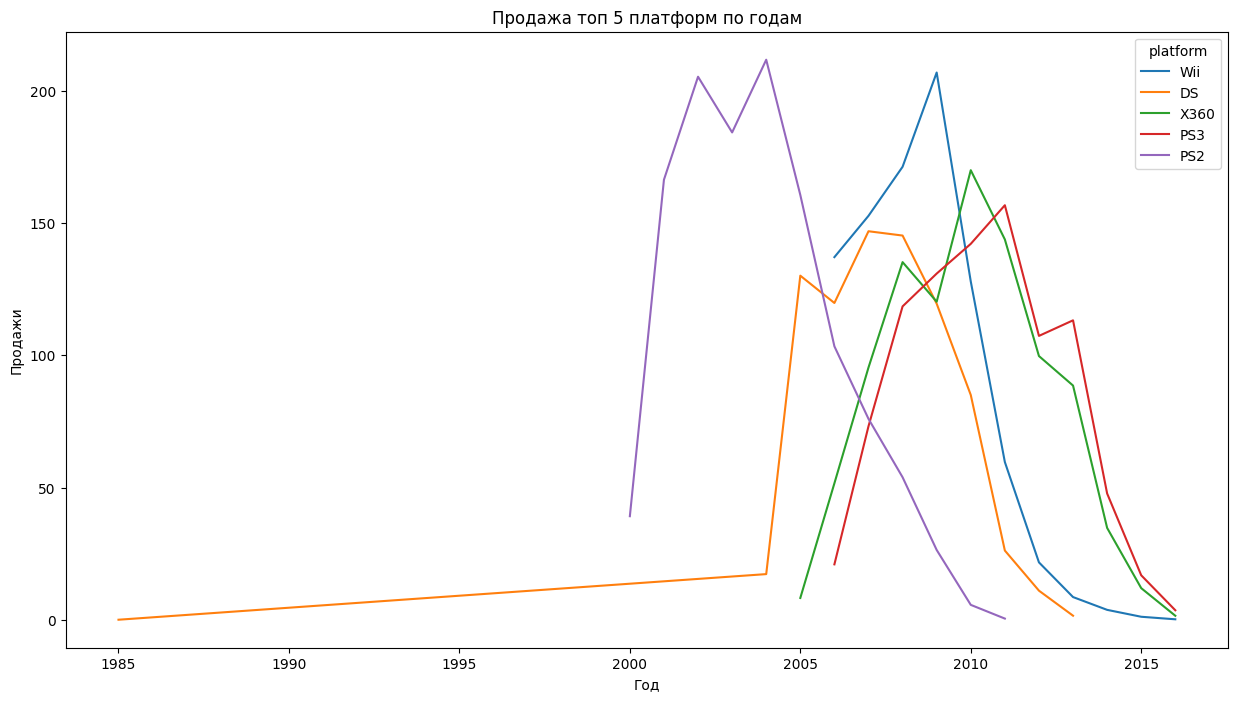

In [30]:
is_in_top5 = data[data['platform'].isin(top5['Платформа'])]

plt.figure(figsize = (15,8))
sb.lineplot (x ='year_of_release', y ='total_sales', hue = 'platform', data=is_in_top5, estimator = 'sum', errorbar = None)
plt.title('Продажа топ 5 платформ по годам')
plt.xlabel("Год")
plt.ylabel("Продажи")

In [31]:
PS2 = data.loc[data['platform']=='PS2'].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
X360 = data.loc[data['platform']=='X360'].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
PS3 = data.loc[data['platform']=='PS3'].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
Wii = data.loc[data['platform']=='Wii'].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
DS = data.loc[data['platform']=='DS'].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
PS2

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
platform,,,,,,,,,,,,
PS2,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.9,26.4,5.64,0.45


In [32]:
X360

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
X360,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


In [33]:
PS3

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.6


In [34]:
Wii

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
Wii,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


In [35]:
DS 

year_of_release,1985,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
platform,,,,,,,,,,,
DS,0.02,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54


1. PS2 - Платформа, которая продала максимум по всему миру игр. Но уже а 2011 году платформа закрылась.
2. X360 - Вторая в списке. Но сравнивая с  2008 годом в 2016 году продажи упали в 88 раз. Рост продаж не ожидается
3. PS3 - Максимально прибыльный год был в 2011 году.С 2014 года начался резкий спад. в 2016 году прибыль упала в 40 раз по сравнению с прибыльным годом.
4. Wii - Самый прибыльный год в 2009 год. После этого ежегодны спад. 
5. DS - Компания закрылась в 2013 году.

Все компании либо закрылись либо на грани закрытия.Это не те компании на которые надо сделать ставку и спланировать рекламные кампании. В следующем пункте мы возьмем популярные платформы последних 2-х лет 2015-2016год. 

In [36]:
all_pl= data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
pd.set_option('display.max_columns', None)
all_pl

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.33,12.64,0.65,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Продажи')

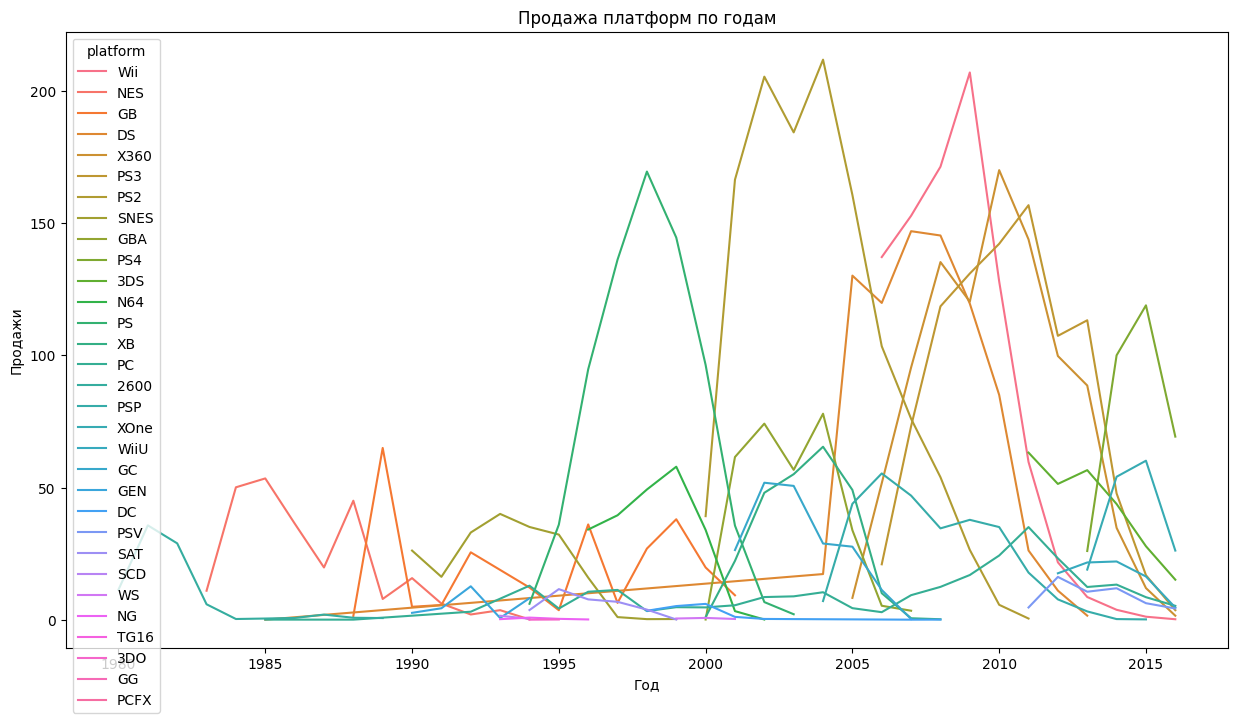

In [37]:
plt.figure(figsize = (15,8))
sb.lineplot (x ='year_of_release', y ='total_sales', hue = 'platform', data= data, estimator = 'sum', errorbar = None)
plt.title('Продажа платформ по годам')
plt.xlabel("Год")
plt.ylabel("Продажи")


Если смотреть игры после первого кризиса, то видно что в основном все игры идут по перевернутой параболе.Первые 5 лет платформа акктивно развивается, следующие 5 лет идет затухание.В итоге примерная жизнь платформы 10 лет 


## 3.3 <a id="three3"></a> Определение актуального периода для будущего анализа.    

 Возьмем данные за соответствующий актуальный период 2015-2016 год (эти данные помогут построить прогноз на 2017 год).

In [38]:
data_last_year = data.loc[data['year_of_release'].isin([2015,2016])]
data_last_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_inf,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not_inf,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,not_inf,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not_inf,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_inf,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not_inf,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_inf,0.01


## 3.4 <a id="three4"></a> Определение потенциально прибыльных платформ

In [39]:

(data_last_year.groupby('platform', as_index=False).agg({'total_sales' : 'sum'}) # группируем по платформам и считаем сумму продаж
                                                   .sort_values(by='total_sales', ascending=False) # сортируем по убыванию продаж
                                                   .rename({'platform' : 'Платформа'
                                                          , 'total_sales' : 'Всего продаж'}, axis=1) # переименовываем столбцы
)

,Платформа,Всего продаж
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


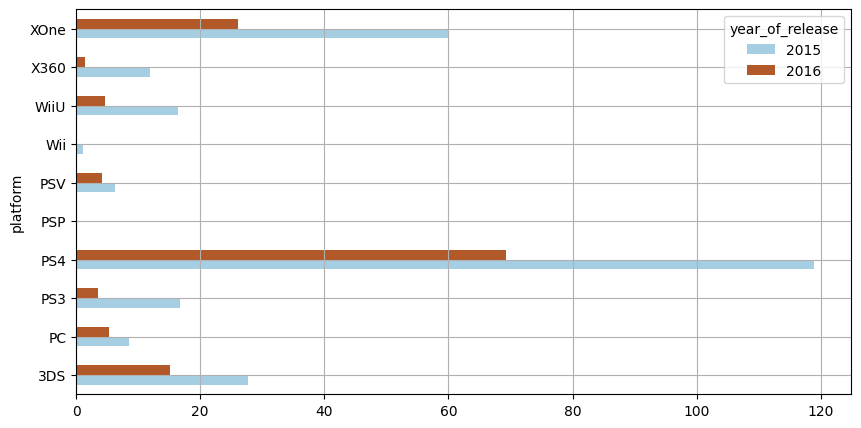

In [40]:
plat_top = data_last_year.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
plat_top.plot(kind='barh', grid = True, figsize = (10,5), colormap = 'Paired')
plt.show()

Самые прибыльные платформы:
- PS4
- XOne
- 3DS

Во всех платформах по сравнению с 2015 годом идет понижение прибыли.Но три компании выше в 2016 году имееют высокую прибыль. Мы можем считать их как потенциально прибыльные платформы.



## 3.5 <a id="three5"></a> График по глобальным продажам игр в разбивке по платформам

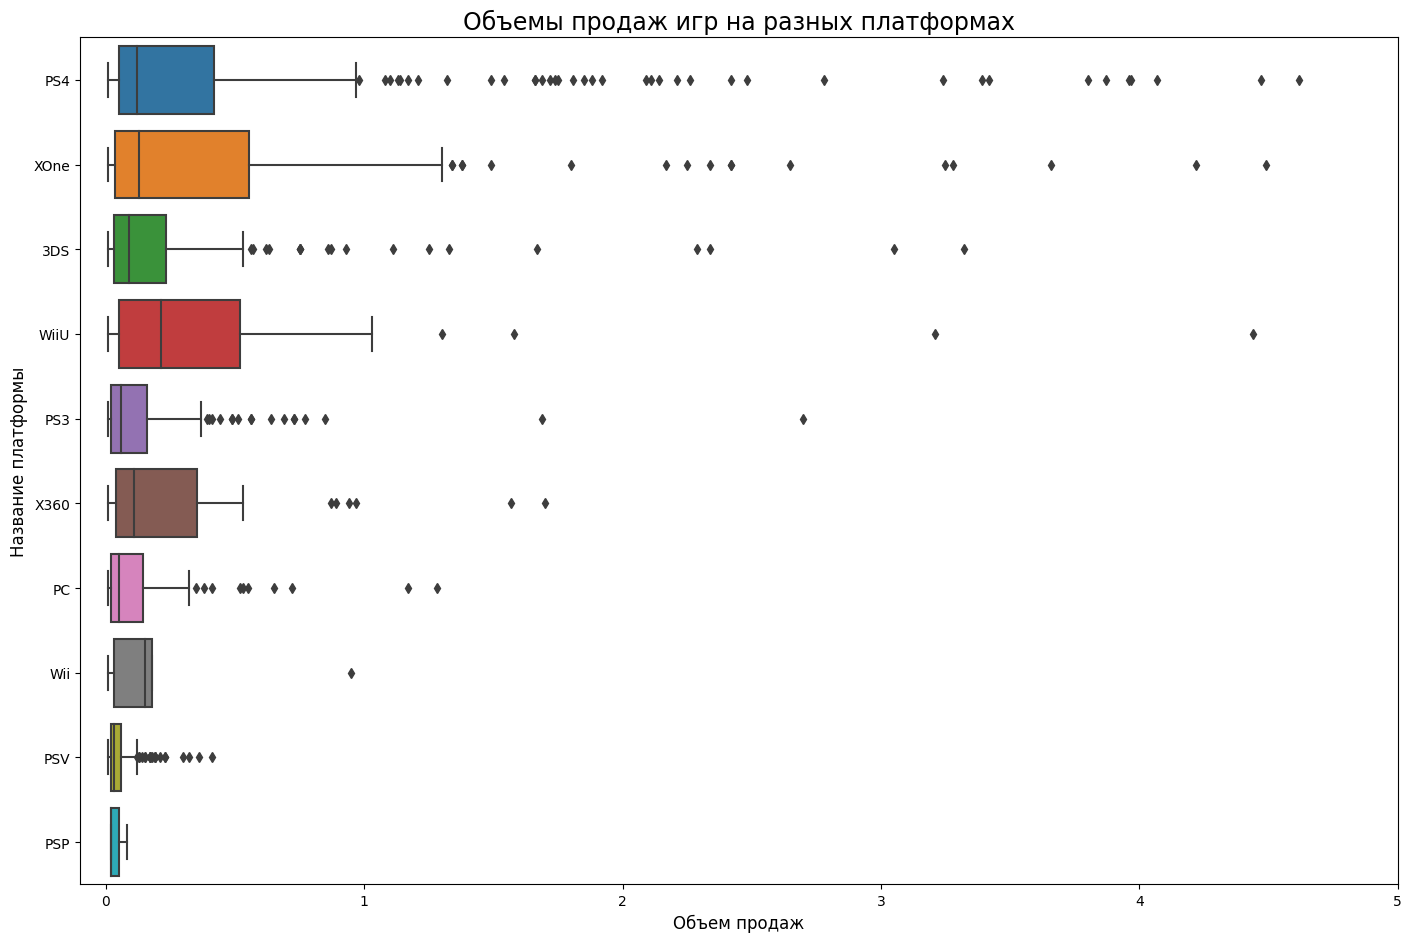

In [41]:
import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data_last_year, y='platform', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

In [42]:
data_last_year.loc[(data_last_year['platform']=='PS4') & (data_last_year['total_sales']>=4)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_inf,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not_inf,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [43]:
data_last_year.loc[(data_last_year['platform']=='XOne') & (data_last_year['total_sales']>=4)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,not_inf,7.39
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [44]:
data_last_year.loc[(data_last_year['platform']=='3DS') & (data_last_year['total_sales']>=4)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,not_inf,7.14


По графику в 2015-2016 году видно что игры с максимально выручкой находятся на платформе "фаворитах", которые мы отметили в прошлом пункте (PS4, XOne, 3DS)
По трём таблицам выше показаны игры, выпущенные в 2015-2016 году, с максимальной выручкой больше 4:
- Call of Duty: Black Ops 3	
- FIFA 16 
- Star Wars Battlefront (2015)	
- FIFA 17	
- Fallout 4	
- Call of Duty: Black Ops 3
- Halo 5: Guardians 
- Fallout 4 
- Pokemon Sun/Moon 

## 3.6 <a id="three6"></a> Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков     
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

- PS4

Text(0, 0.5, 'Продажи')

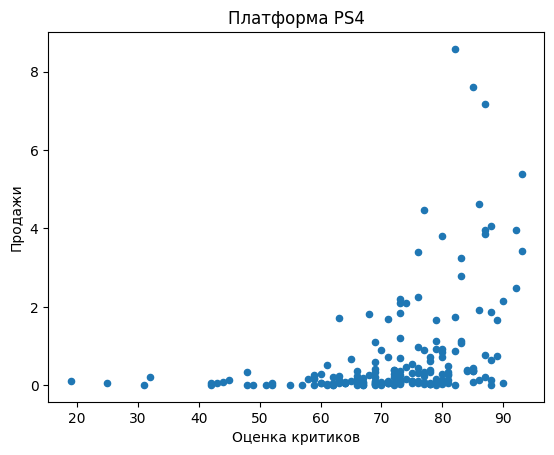

In [45]:
data_last_year.loc[data_last_year['platform']=='PS4'].plot(x ='critic_score', y= 'total_sales', kind='scatter')
plt.title('Платформа PS4')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

In [46]:
data_last_year.loc[data_last_year['platform']=='PS4'][['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.392849
total_sales,0.392849,1.000000


Зависимость есть. Так же игры с отзывами больше чем 60 отличаются прибыльностью.
Отзывы экспертов важны для продаж.

Text(0, 0.5, 'Продажи')

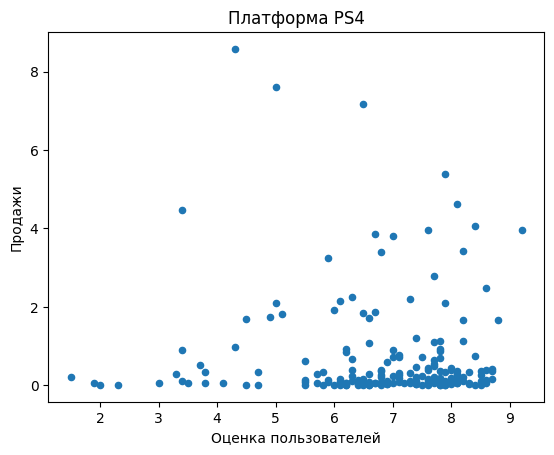

In [47]:
data_last_year.loc[data_last_year['platform']=='PS4'].plot(x ='user_score', y= 'total_sales', kind='scatter')
plt.title('Платформа PS4')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

In [48]:
data_last_year.loc[data_last_year['platform']=='PS4'][['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.059738
total_sales,-0.059738,1.000000


Корреляции почти нет. Хотя по графику видно что с отзывами больше 3 продаж больше.

- XOneб

Text(0, 0.5, 'Продажи')

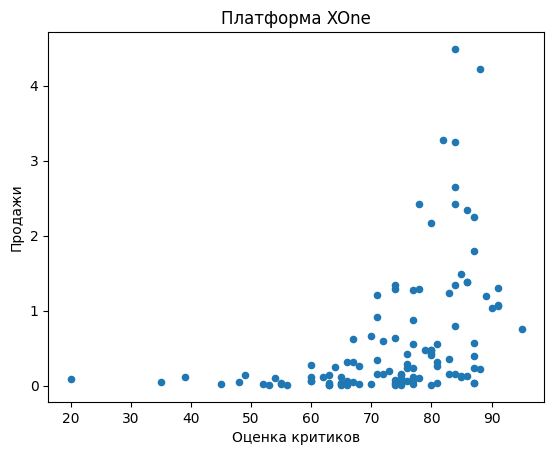

In [49]:
data_last_year.loc[data_last_year['platform']=='XOne'].plot(x ='critic_score', y= 'total_sales', kind='scatter')
plt.title('Платформа XOne')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

In [50]:
data_last_year.loc[data_last_year['platform']=='XOne'][['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.430889
total_sales,0.430889,1.000000


Text(0, 0.5, 'Продажи')

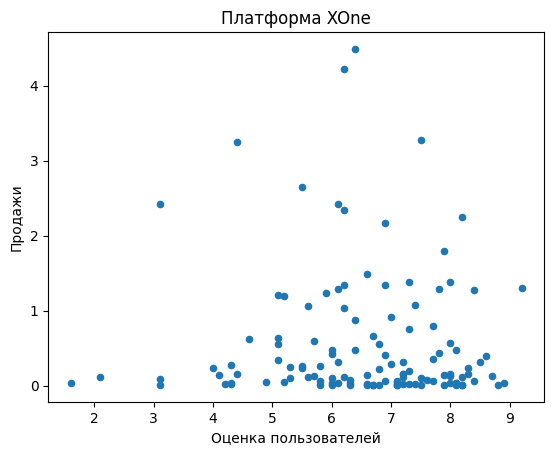

In [51]:
data_last_year.loc[data_last_year['platform']=='XOne'].plot(x ='user_score', y= 'total_sales', kind='scatter')
plt.title('Платформа XOne')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

In [52]:
data_last_year.loc[data_last_year['platform']=='XOne'][['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.041467
total_sales,-0.041467,1.000000


- 3DS

Text(0, 0.5, 'Продажи')

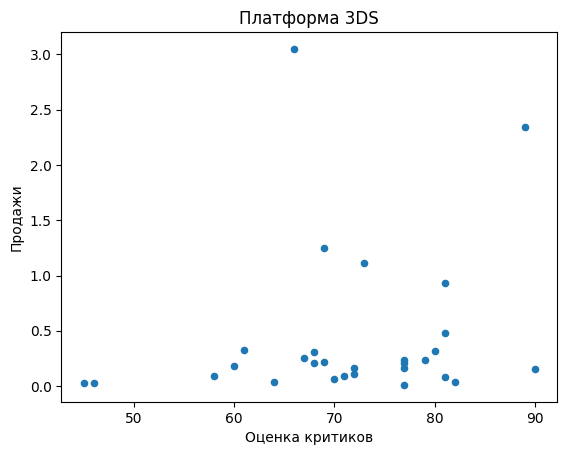

In [53]:
data_last_year.loc[data_last_year['platform']=='3DS'].plot(x ='critic_score', y= 'total_sales', kind='scatter')
plt.title('Платформа 3DS')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

In [54]:
data_last_year.loc[data_last_year['platform']=='3DS'][['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.177575
total_sales,0.177575,1.000000


Text(0, 0.5, 'Продажи')

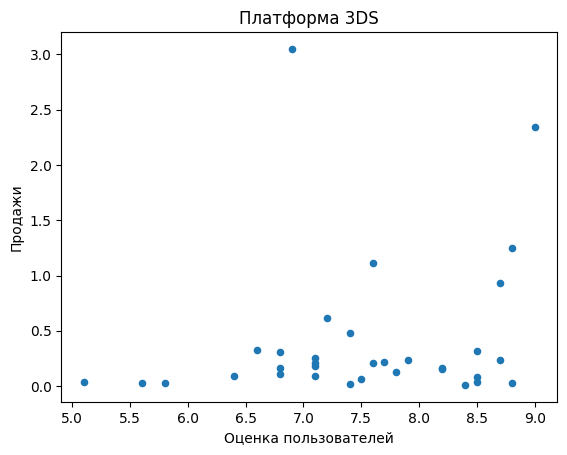

In [55]:
data_last_year.loc[data_last_year['platform']=='3DS'].plot(x ='user_score', y= 'total_sales', kind='scatter')
plt.title('Платформа 3DS')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

In [56]:
data_last_year.loc[data_last_year['platform']=='3DS'][['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.198796
total_sales,0.198796,1.000000


Ситуация такая же, как и у платформы PS4:
1. Корреляция слабая, но "отзыв эксперта-цена" выше, чем "отзыв клиента -цена"
2. По диаграмме видно, что игры с хорошими отзывами лучше продаются.

## 3.7 <a id="three7"></a> Распределение игр по жанрам

In [57]:
genre = data_last_year.groupby('genre').agg({'total_sales':'sum'}).reset_index()
genre.sort_values(by='total_sales', ascending=False)

,genre,total_sales
8,Shooter,105.73
0,Action,102.13
10,Sports,64.33
7,Role-Playing,55.82
3,Misc,14.17
2,Fighting,12.37
1,Adventure,11.98
6,Racing,10.86
4,Platform,9.28
9,Simulation,7.55


Самые три продаваемые жанра:
1. Стрелялки  
2. Экшен
3. Спорт



# **4 шаг.** <a id="four"></a> Портрет пользователя каждого региона

## 4.1 <a id="four1"></a> Самые популярные платформы (топ-5)

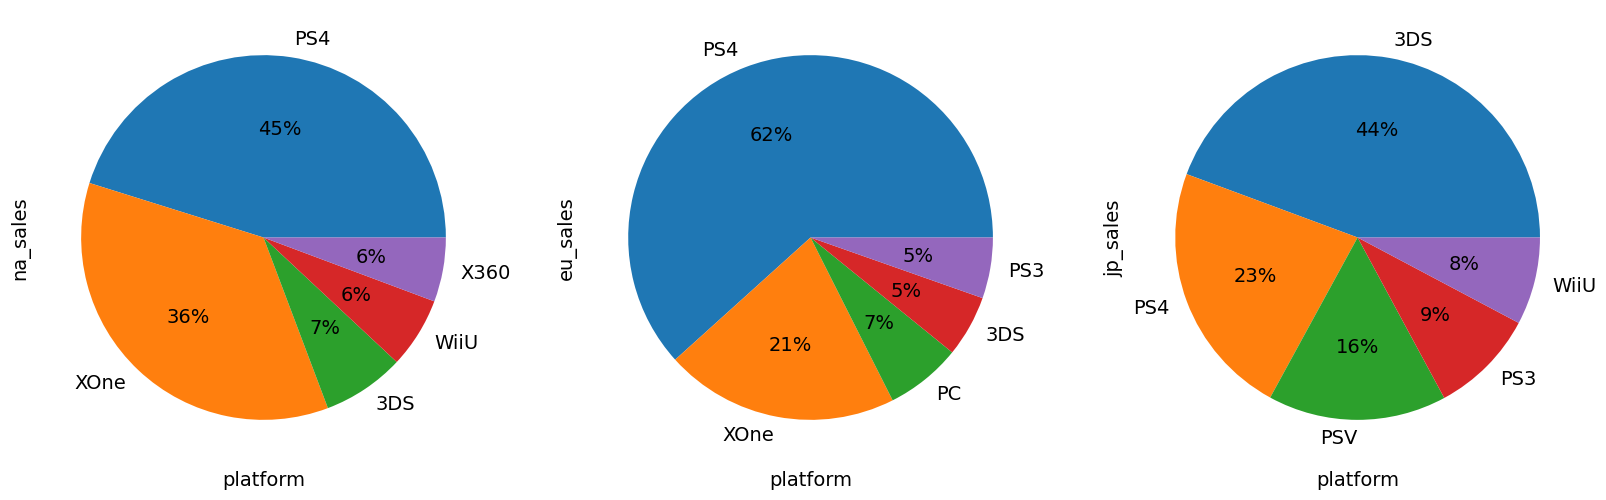

In [58]:
region = ['na_sales', 'eu_sales', 'jp_sales']
parametrs = ['platform']
plt.figure (figsize = (20,15))
plt.subplots_adjust(hspace=0.3)

num = 1

for n in parametrs:
    for y in region:
        ax = plt.subplot(1,3,num)
        plt.xlabel(n, fontsize=14)
        plat_reg_2= data_last_year.groupby(n).agg({y:'sum'}).sort_values(by=y, ascending=False)[:5]
        plat_reg_2.plot(kind='pie', ax=ax, label= n, fontsize=14, subplots= True, legend= False, autopct = '%1.0f%%')
        plt.ylabel (y, fontsize=14)
        num += 1
   

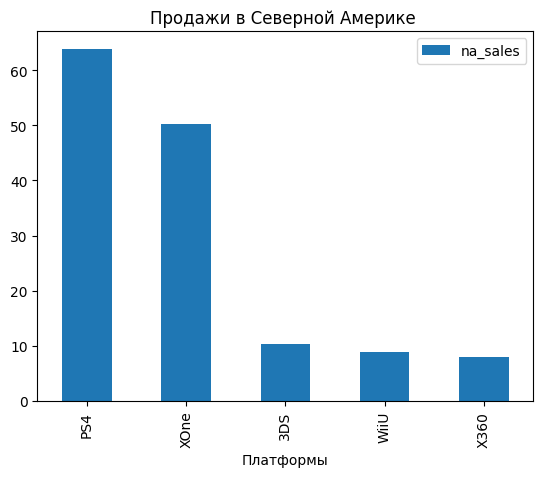

In [59]:
data_last_year.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Северной Америке ')
plt.xlabel("Платформы")
plt.show()

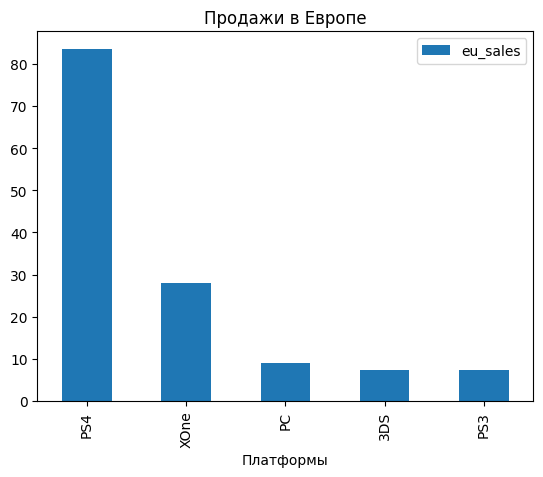

In [60]:
data_last_year.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Европе')
plt.xlabel("Платформы")
plt.show()

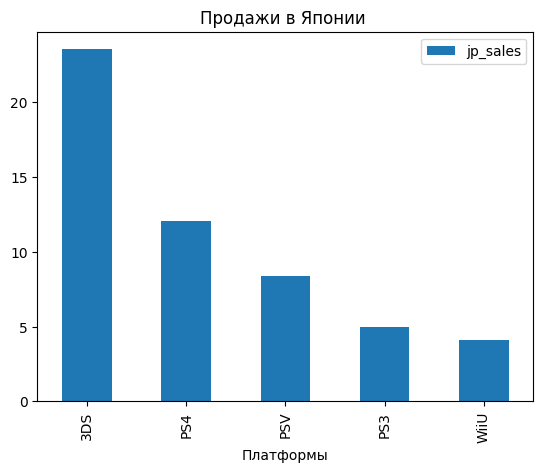

In [61]:
data_last_year.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Японии ')
plt.xlabel("Платформы")
plt.show()

Популярные платформы в Америке:
1. PS4
2. XOne
3. 3DS
4. WiiU
5. X360

Популярные платформы в Европе:
1. PS4
2. XOne
3. PC
4. 3DS
5. PS3

Популярные платформы в Японии:
1. 3DS
2. PS4
3. PCV
4. PS3
5. WiiU

В разных странах предпочтения разные, но видно, то все равно лидирует  PS4

## 4.2 <a id="four2"></a> Самые популярные жанры (топ-5)

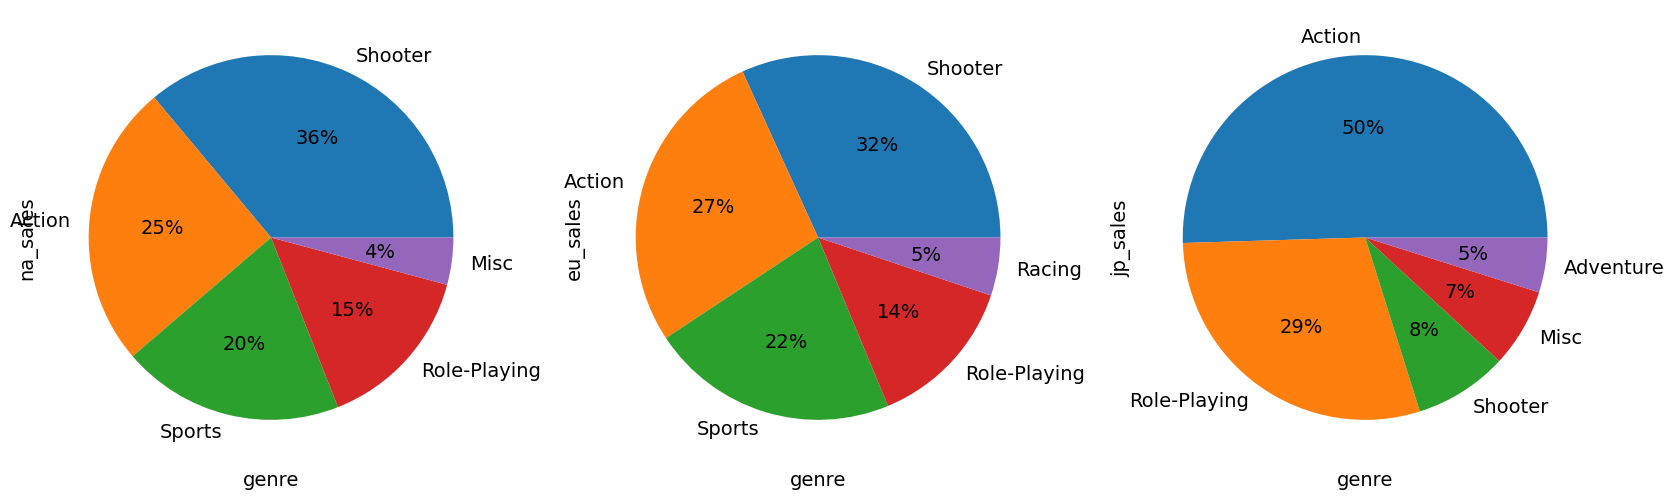

In [62]:
region = ['na_sales', 'eu_sales', 'jp_sales']
parametrs = ['genre']
plt.figure (figsize = (20,15))
plt.subplots_adjust(hspace=0.3)

num = 1

for n in parametrs:
    for y in region:
        ax = plt.subplot(1,3,num)
        plt.xlabel(n, fontsize=14)
        plat_reg_2= data_last_year.groupby(n).agg({y:'sum'}).sort_values(by=y, ascending=False)[:5]
        plat_reg_2.plot(kind='pie', ax=ax, label= n, fontsize=14, subplots= True, legend= False, autopct = '%1.0f%%')
        plt.ylabel (y, fontsize=14)
        num += 1
   

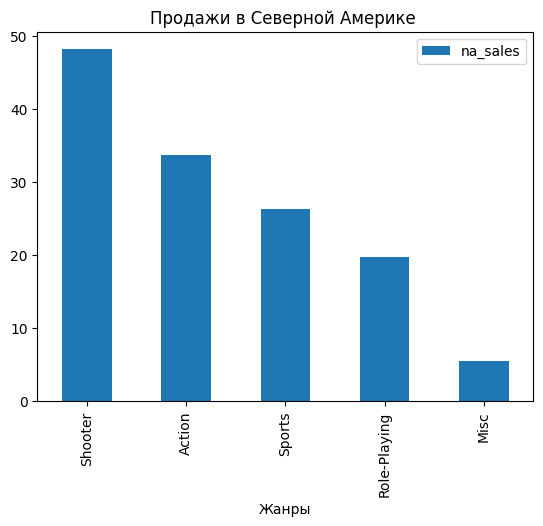

In [63]:
data_last_year.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Северной Америке ')
plt.xlabel("Жанры")
plt.show()

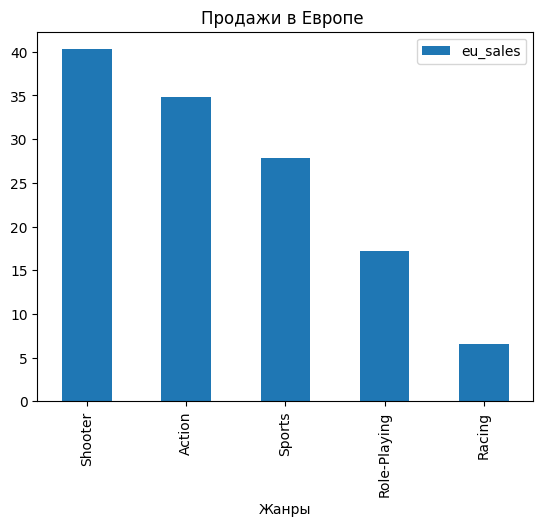

In [64]:
data_last_year.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Европе ')
plt.xlabel("Жанры")
plt.show()

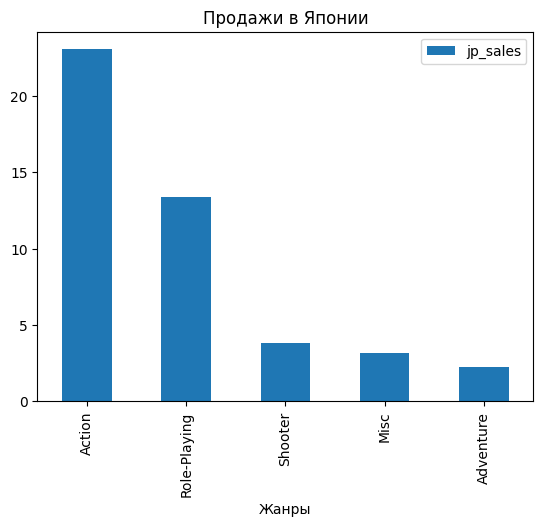

In [65]:
data_last_year.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Японии')
plt.xlabel("Жанры")
plt.show()

Продажи по популярным жанрам совподают в Америке  и Европе:
1. Шутер (стрелялка)
2. Экшен
3. Спорт
4. Ролевые игры
5. Прочее

А вот в Японии другие предпочтения:
1. Экшен
2. Ролевые игры
3. Стрелялки 
4. Прочее
5. Приключения 

## 4.3 <a id="four3"></a> Влияние рейтинга ESRB на продажи в отдельном регионе

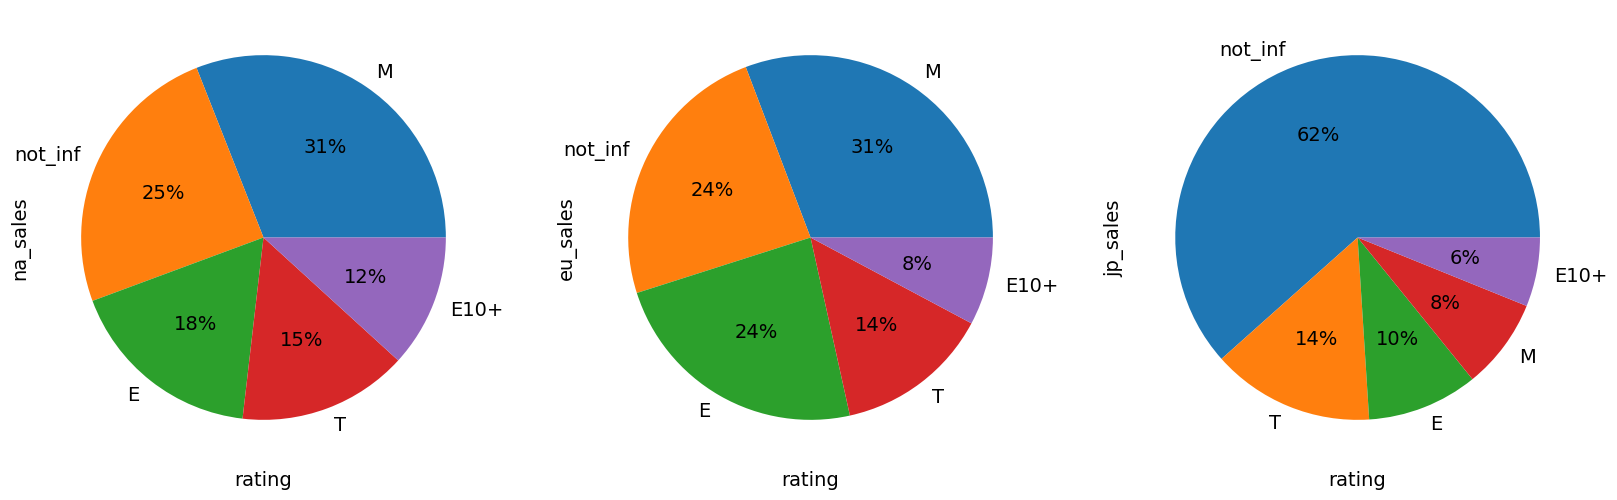

In [66]:
region = ['na_sales', 'eu_sales', 'jp_sales']
parametrs = ['rating']
plt.figure (figsize = (20,15))
plt.subplots_adjust(hspace=0.3)

num = 1

for n in parametrs:
    for y in region:
        ax = plt.subplot(1,3,num)
        plt.xlabel(n, fontsize=14)
        plat_reg_2= data_last_year.groupby(n).agg({y:'sum'}).sort_values(by=y, ascending=False)[:5]
        plat_reg_2.plot(kind='pie', ax=ax, label= n, fontsize=14, subplots= True, legend= False, autopct = '%1.0f%%')
        plt.ylabel (y, fontsize=14)
        num += 1

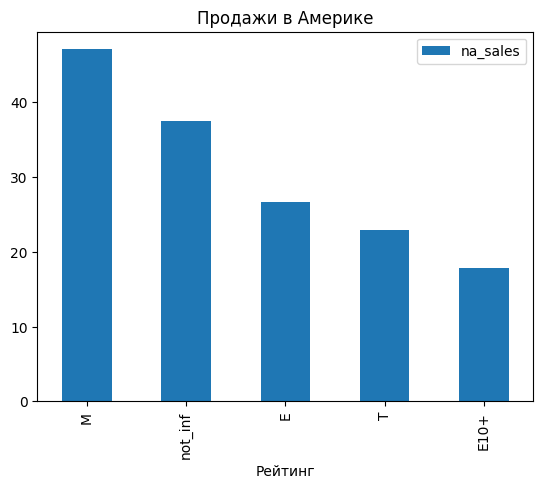

In [67]:
data_last_year.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Америке')
plt.xlabel("Рейтинг")
plt.show()

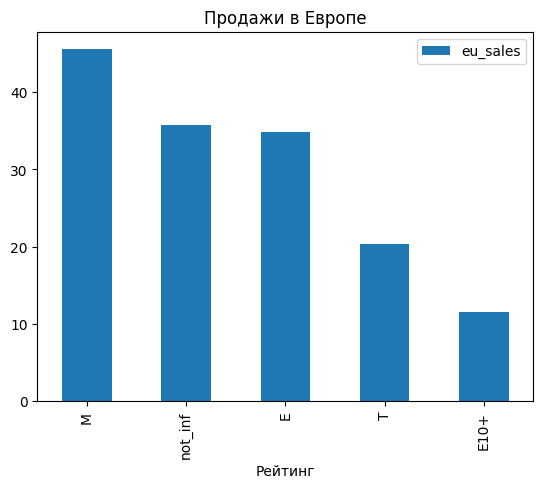

In [68]:
data_last_year.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Европе')
plt.xlabel("Рейтинг")
plt.show()

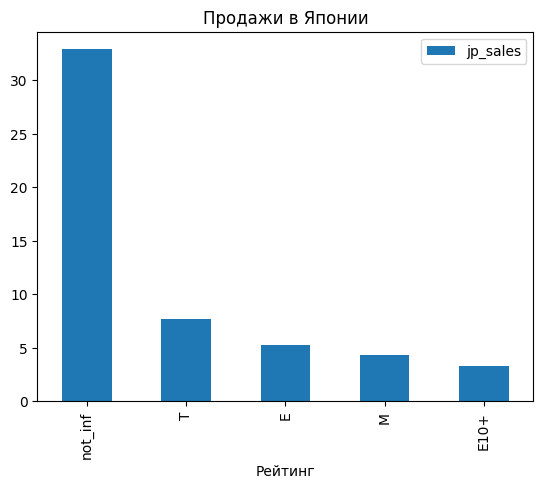

In [69]:
data_last_year.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Продажи в Японии')
plt.xlabel("Рейтинг")
plt.show()

- E	Для всех
- M	От 17 лет
- T	Подросткам 13—19 лет
- E10+	Для всех старше 10 лет

В Америке и Европе данные совподают:
1. От 17 лет 
2. Нет данных
3. Для всех
4. Подросткам 
5. От 10 лет 

В Японии:
1. Нет данных
2. Подросткам
3. Всем
4. От 17 лет 
5. От 10 лет 

В Америке и Европе влияет рейтинг ESRB на продажи.Самый популярный рейтинг M. А вот в Японии рейтинг ESRB особо не влияет.В Японии большинство игр не имеет рейтинга ESRB, так как они имеют свой рейтинг.

# **5 шаг.** <a id="five"></a> Проверка гипотез

## 5.1 <a id="five1"></a> Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0: средний пользовательский рейтинг платформ XOne и PC одинаковый
- H1: средний пользовательский рейтинг платформ XOne и PC различается

In [70]:
XOne_gip = data_last_year[(data_last_year['platform'] == 'XOne') & (data_last_year['user_score']>0)]['user_score']
PC_gip = data_last_year[(data_last_year['platform'] == 'PC') & (data_last_year['user_score']>0)]['user_score']
print('средний пользовательский рейтинг платформ XOne',XOne_gip.mean())
print('средний пользовательский рейтинг платформ PC',PC_gip.mean())

средний пользовательский рейтинг платформ XOne 6.542148760330578
средний пользовательский рейтинг платформ PC 6.29642857142857


In [71]:
alpha = .05

results = st.ttest_ind(XOne_gip, PC_gip, equal_var= False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Мы выбрали специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как генеральные совокупности не зависят друг от друга

Нулевая гипотеза "средний пользовательский рейтинг платформ XOne и PC одинаковый" предполагает альтернативу, что рейтинги не одинаковые без указания, в какую сторону они отличаются 

Критический уровень статистической значимости задали значением 0.05

Не получилось отвергнуть нулевую гипотезу, так как средний пользовательский рейтинг платформ XOne и PC не одинаковы, но очень близки 

## 5.2 <a id="five2"></a> Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

- H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: средние пользовательские рейтинги жанров Action и Sports разные

In [72]:
act_gip = data_last_year[(data_last_year['genre'] == 'Action') & (data_last_year['user_score']>0)]['user_score']
sport_gip = data_last_year[(data_last_year['genre'] == 'Sports') & (data_last_year['user_score']>0)]['user_score']
print('Средние пользовательские рейтинги жанров Action',act_gip.mean())
print('Средние пользовательские рейтинги жанров Sports' ,sport_gip.mean())

Средние пользовательские рейтинги жанров Action 6.808290155440415
Средние пользовательские рейтинги жанров Sports 5.198780487804878


In [73]:
alpha = .05

results = st.ttest_ind(act_gip, sport_gip, equal_var= False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Мы выбрали специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, так как генеральные совокупности не зависят друг от друга

Нулевая гипотеза "средний пользовательский рейтинг жанров Action и Sports одинаковые"  предполагает альтернативу, что рейтинги не одинаковые без указания в какую сторону они отличаются 

Критический уровень статистической значимости задали значением 0.05

Отвергнута нулевая гипотеза, так как средний пользовательский рейтинг жанров Action выше чем Sports

# **6 шаг.** <a id="six"></a> Общий вывод


**Вывод по Шагу 1. Предобработка данных**

Описание данных:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score`— оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   

В таблице 16715 строк. 

**Вывод по Шагу 2. Исследовательский анализ данных**

1. Заменили названия столбцов (привели к нижнему регистру)
2. Пропуски:    
- Убрали 2 строки с пропусками в столбцах name, genre
- Формат 'K-A' это то же самое, то 'E'. Преобразовали  для чистоты исследования в 'E'
- Пропуски в остальных столбцах остались так же.
3. Изменили типы данных для столбцов year_of_release, user_score
4. Посчитали суммарные продажи во всех регионах и записали их в столбец total_sales.

**Вывод по Шагу 3. Портрет пользователя каждого региона**

1. Выпуски игр начались в  1980 году. В 1983-1985 был первый кризис по источникам интернета. А если смотреть на график, то  в 1985-1990 выпуск игр сильно уменьшился. Самый пик выпуска игр в 2005-2013 году. И опять после 2013 года кризис связанный с онлайн играми и мобильными играми. А еще потому что клиенты не хотели тратить деньги на игры. Это привело  закрытию многих успешных игр.
2.  Мы вытащили самые популярные 5 платформ.
- PS2-платформа которая продала максимум по всему миру игр. Но уже а 2011 году платформа закрылась.
-  X360-вторая в списке. Но сравнивая с  2008 годом в 2016 году продажи упали в 88 раз. Рост продаж не ожидается
- PS3- Максимально прибыльный год был в 2011 году. С 2014 года начался резкий спад. в 2016 году прибыль упала в 40 раз по сравнению с прибыльным годом.
-  Wii - Самый прибыльный год в 2009 год. После этого ежегодный спад. 
-  DS- Компания закрылась в 2013 году.

3. Все компании либо закрылись либо на грани закрытия. Это не те компании на которые надо сделать ставку и спланировать рекламные кампании. В следующем пункте мы взяли популярные платформы последних 2-х лет 2015-2016год. 

4.  Самые прибыльные платформы 2015-2016 года:
- PS4
- XOne
- 3DS

Во всех платформах по сравнению с 2015 годом идет понижение прибыли. Но три компании выше в 2016 году имеет высокую прибыль. Мы можем считать их как потенциально прибыльные платформы.

5. В этих трех популярных платформах мы выделили игры с большой выручкой:
- Call of Duty: Black Ops 3 
- FIFA 16 
- Star Wars Battlefront (2015)  
- FIFA 17   
- Fallout 4 
- Call of Duty: Black Ops 3
- Halo 5: Guardians 
- Fallout 4 
- Pokemon Sun/Moon 

6. Влияние на продажи внутри платформы PS4 отзывы пользователей и критиков:
- Зависимость между отзывами критиков и продажами есть.Игры с отзывами больше 60 продаются чаще
- Зависимость между отзывами пользователей и продажами по корреляции нет или очень слабая, но если посмотреть граффик , то игры с отзывами больше 3 продаются чаще     

Влияние на продажи внутри платформы XOneб, 3DS отзывы пользователей и критиков такая же как и у PS4.

7. ТОП трех популярных жанров:
- Стрелялки
- Экшен
- Спорт

**Вывод по Шагу 4.Портрет пользователя каждого региона**

**1.** Самые популярные платформы (топ-5) в разных регионах за последние 2 года:
Популярные платформы в Америке:
1. PS4
2. XOne
3. 3DS
4. WiiU
5. X360

Популярные платформы в Европе:
1. PS4
2. XOne
3. PC
4. 3DS
5. PS3

Популярные платформы в Японии:
1. 3DS
2. PS4
3. PCV
4. PS3
5. WiiU

В разных странах предпочтения разные, но видно, то все равно лидирует  PS4

**2.** Самые популярные жанры (топ-5) в разных регионах

Продажи по популярным жанрам совпадают в Америке  и Европе:
1. Шутер (стрелялка)
2. Экшен
3. Спорт
4. Ролевые игры
5. Прочее

А вот в Японии другие предпочтения:
1. Экшен
2. Ролевые игры
3. Стрелялки 
4. Прочее
5. Приключения 

**3.** В Америке и Европе влияет рейтинг ESRB на продажи. Самый популярный рейтинг M. А вот в Японии рейтинг ESRB особо не влияет.


**Вывод по Шагу 5.Проверка гипотез**

- 1 нулевая гиппотеза Средние пользовательские рейтинги платформ XOne и PC одинаковые.      
Использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Критический уровень статистической значимости задали значением 0.05. Не получилось отвергнуть нулевую гипотезу.

- 2 нулевая гипотеза средний пользовательский рейтинг жанров Action и Sports одинаковый.Отвергаем нулевую гипотезу.Использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Критический уровень статистической значимости задали значением 0.05.    


Перед нами стояла задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й. Выше мы выявили успешные платформы, игры с потенциалом на 2017 год.Так же посмотрели зависимости между жанром, категорией, оценкой критиков и клиентов и покупками.